In [1]:
# analysis\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
data_dir= "C:\\Users\\KZ26677\\Desktop\\JD project\\EMR\\EMR\\data"

In [3]:
#read in csv export of Business Analyst data at block group level
data = pd.read_csv(os.path.join(data_dir,"BlockGroup_BA_ACS_18.csv"))
dataID = data["ID"]
#data
data2 = pd.read_csv(os.path.join(data_dir,"ZS.csv"))

In [4]:
#table visualization to aid in sorting/indexing
data['ID'] = data['ID'].astype(str)
data2['GEOID'] = data2['GEOID'].astype(str)

In [5]:
data.sort_values("ID").head()

,ObjectID,ID,NAME,ACSTOTPOP,MOETOTPOP,SUPTOTPOP,RELTOTPOP,ACSTOTHH,MOETOTHH,SUPTOTHH,...,POP_C,HH_C,HU_C,BUS_C_CY,DPW_C_CY,DPR_C_CY,RG_NAME,RG_ABBREV,Shape_Length,Shape_Area
177408,39601,100010401001,1.000104e+08,3203,427,0,1.0,1143,149,0,...,2637.0,892.0,932.0,28.0,77.0,1574.0,Delaware,DE,42494.293894,8.290477e+07
177409,39602,100010401002,1.000104e+08,1772,442,0,2.0,687,148,0,...,2174.0,793.0,849.0,35.0,213.0,1110.0,Delaware,DE,46080.974315,6.936527e+07
177410,39603,100010401003,1.000104e+08,1523,302,0,2.0,583,96,0,...,1730.0,640.0,688.0,22.0,96.0,1078.0,Delaware,DE,41074.269841,5.595596e+07
177411,39604,100010402011,1.000104e+08,2572,323,0,1.0,824,104,0,...,2666.0,957.0,1013.0,51.0,1398.0,1606.0,Delaware,DE,19080.915086,1.355415e+07
177412,39605,100010402012,1.000104e+08,2571,348,0,1.0,1107,157,0,...,2375.0,892.0,1010.0,144.0,1028.0,1151.0,Delaware,DE,7263.705457,2.783799e+06


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217195 entries, 0 to 217194
Columns: 1622 entries, ObjectID to Shape_Area
dtypes: float64(434), int64(1185), object(3)
memory usage: 2.6+ GB


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215880 entries, 0 to 215879
Data columns (total 21 columns):
FID         215880 non-null int64
Shape       215880 non-null object
STATEFP     215880 non-null int64
COUNTYFP    215880 non-null int64
TRACTCE     215880 non-null int64
BLKGRPCE    215880 non-null int64
GEOID       215880 non-null object
NAMELSAD    215880 non-null object
MTFCC       215880 non-null object
FUNCSTAT    215880 non-null object
ALAND       215880 non-null int64
AWATER      215880 non-null int64
INTPTLAT    215880 non-null float64
INTPTLON    215880 non-null float64
result      215880 non-null float64
mean        215880 non-null float64
median      215880 non-null int64
min         215880 non-null int64
max         215880 non-null int64
std         215880 non-null float64
sum         215880 non-null int64
dtypes: float64(5), int64(11), object(5)
memory usage: 34.6+ MB


In [49]:
# Uses a left inner join to combine the datasets on "geoid" containing only match records
# This removes outlieing areas suchs as Alaska, Hawaii, PR, etc.

# references to cells used in join
baid = data["ID"]
zsid = data2["GEOID"]
IDS = pd.concat([zsid,baid],axis=1)



,GEOID,ID
0,10030116024,150010201001
1,10030113003,150010201002
2,10030112024,150010201003
3,10030114013,150010201004
4,10030109042,150010202021
5,10030101001,150010202022
6,10030114012,150010203001
7,10030109051,150010203002
8,10030110001,150010203003
9,10810405002,150010204001


In [52]:
BlockGroup_BA_ACS_18_zs = data.merge(data2, left_on="ID", right_on="GEOID", how="inner")
BlockGroup_BA_ACS_18_zs.head()


,ObjectID,ID,NAME,ACSTOTPOP,MOETOTPOP,SUPTOTPOP,RELTOTPOP,ACSTOTHH,MOETOTHH,SUPTOTHH,...,AWATER,INTPTLAT,INTPTLON,result,mean,median,min,max,std,sum
0,29150,60790110011,6.079011e+07,2215,518,0,2.0,828,122,0,...,0,35.262532,-120.639273,27.48680,27.48680,35,10,90,14.0824,5195
1,29162,60790111031,6.079011e+07,1366,351,0,2.0,567,111,0,...,0,35.262354,-120.664669,38.03570,38.03570,35,10,90,16.1838,6390
2,29163,60790111032,6.079011e+07,1314,338,0,2.0,673,120,0,...,0,35.253040,-120.658019,58.30110,58.30110,65,0,90,20.4907,33115
3,29169,60790113001,6.079011e+07,3566,552,0,1.0,1353,151,0,...,0,35.250687,-120.694039,46.09260,46.09260,35,10,90,16.7805,19405
4,29172,60790113004,6.079011e+07,811,353,0,2.0,234,94,0,...,0,35.254460,-120.682117,7.57191,7.57191,0,0,90,24.8433,627795


In [ ]:
BlockGroup_BA_ACS_18_zs.to_csv("BlockGroup_BA_ACS_18_zs.csv",index = False)
# BlockGroup_BA_ACS_18_zs = pd.read_csv("BlockGroup_BA_ACS_18_zs.csv")

In [ ]:
BlockGroup_BA_ACS_18_zs_small = BlockGroup_BA_ACS_18_zs[["GEOID","ID","X4009_X","X4010_X","X4011_X","X4012_X","AREA","ALAND","mean","median","std","sum"]]
BlockGroup_BA_ACS_18_zs_small

In [53]:
num_data = BlockGroup_BA_ACS_18_zs.select_dtypes(include=['float64','int64'])

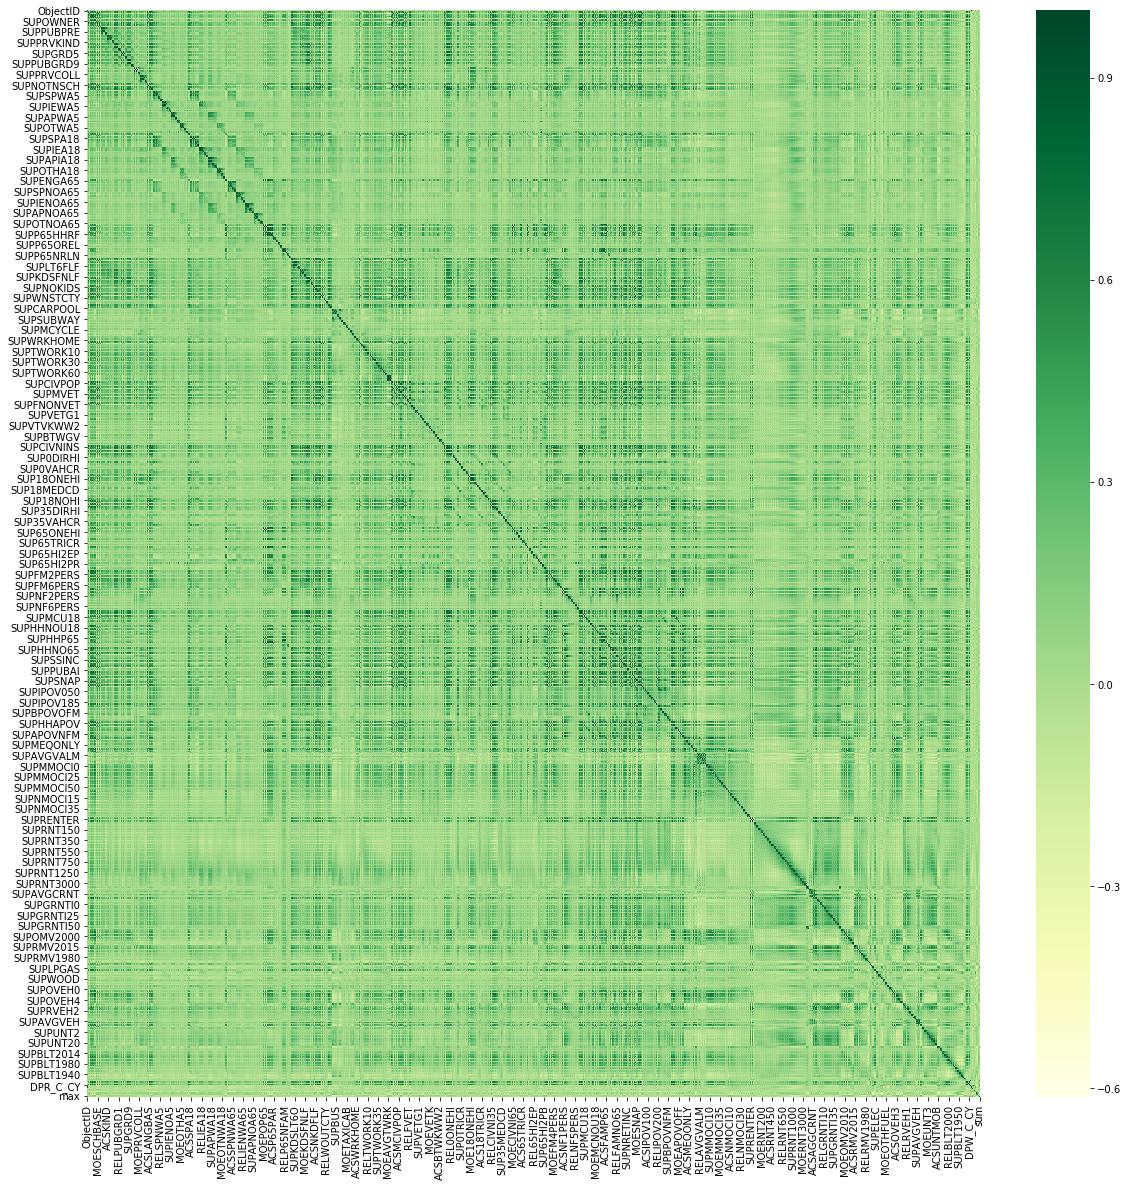

In [56]:
corr_mat = num_data.corr()
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(20,20))
sns.heatmap(corr_mat, cmap='YlGn')
plt.show()


In [57]:
num_data.head()

,ObjectID,NAME,ACSTOTPOP,MOETOTPOP,SUPTOTPOP,RELTOTPOP,ACSTOTHH,MOETOTHH,SUPTOTHH,RELTOTHH,...,AWATER,INTPTLAT,INTPTLON,result,mean,median,min,max,std,sum
0,29150,6.079011e+07,2215,518,0,2.0,828,122,0,1.0,...,0,35.262532,-120.639273,27.48680,27.48680,35,10,90,14.0824,5195
1,29162,6.079011e+07,1366,351,0,2.0,567,111,0,1.0,...,0,35.262354,-120.664669,38.03570,38.03570,35,10,90,16.1838,6390
2,29163,6.079011e+07,1314,338,0,2.0,673,120,0,1.0,...,0,35.253040,-120.658019,58.30110,58.30110,65,0,90,20.4907,33115
3,29169,6.079011e+07,3566,552,0,1.0,1353,151,0,1.0,...,0,35.250687,-120.694039,46.09260,46.09260,35,10,90,16.7805,19405
4,29172,6.079011e+07,811,353,0,2.0,234,94,0,2.0,...,0,35.254460,-120.682117,7.57191,7.57191,0,0,90,24.8433,627795


In [61]:
# remove the first three columns
num_data = num_data[2:]

In [66]:
#Standardize the Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
x = StandardScaler().fit_transform(num_data)
pca = PCA(n_components=3)
pca.fit(x)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
svd_solver='auto', tol=0.0, whiten=False)
print((pca.explained_variance_ratio_)) 
print(sum(pca.explained_variance_ratio_))  

[0.14470451 0.0552775  0.03499876]
0.23498077703669096


In [74]:
for i in range(100,300,100):
    pca = PCA(n_components=i)
    pca.fit(x)
    PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
#     print((pca.explained_variance_ratio_)) 
    print(sum(pca.explained_variance_ratio_))  

0.5921507458202678
0.7275882348019099


In [78]:
pca.components_

array([[-0.00419655, -0.00448825,  0.0694316 , ...,  0.00271701,
         0.01397764, -0.00021552],
       [ 0.00761715,  0.00696869,  0.01701384, ...,  0.0329096 ,
         0.02183865,  0.03235317],
       [-0.00224249, -0.00268011, -0.02171454, ...,  0.01999335,
         0.01359166, -0.00552694],
       ...,
       [ 0.00452229,  0.00676451, -0.00213219, ...,  0.02455296,
         0.02124358, -0.01094491],
       [ 0.0119893 ,  0.01327333, -0.0055047 , ..., -0.02571189,
        -0.05758087, -0.00254284],
       [ 0.0138074 ,  0.01605867, -0.00071183, ...,  0.02906979,
         0.00013006, -0.00728746]])

In [84]:
l = pca.components_[0].tolist()
max(l)


0.07079464779097647

In [85]:
num_data.columns[l.index(max(l))]

'ACSIPOVBAS'